In [457]:
%matplotlib inline

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# To make prettier and bigger graphs
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

In [3]:
latest = pd.read_excel('../data/latest - orig.xlsx')
latest.head()

,ProspectID,CreatedOn,mx_Country,mx_Preferred_Campus,mx_Exp_In_Years,DoNotCall,DoNotEmail,mx_Mode_of_Instruction,Source,SourceMedium,...,mx_Current_Interested_Program,mx_Application_Date,mx_Industry,mx_UG_Degree,mx_UG_Passing_Year,mx_PG_Degree,mx_PG_Passing_Year,mx_Batch_Code,mx_City,mx_Device_details
0,65e26baf-5ed5-4c08-92a6-426c0f4052b5,2019-02-16 20:51:09,NaN,Mumbai,2-3 Years,0,0,Classroom,google,Display,...,PGPML-Online,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,smartphone | Xiaomi Redmi 6A | Android 8.1.0 |...
1,a6998bac-67e9-479e-aca9-d2808b4522f1,2019-02-07 15:39:26,NaN,Mumbai,1-2 Years,0,0,NaN,facebook,Mumbai - DSEFT - LAE (1%),...,DSEFT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,smartphone | Xiaomi Redmi 4A | Android 6.0.1 |...
2,c26dbf1b-6e27-44ce-b33f-a090f7acc040,2018-12-30 15:19:59,NaN,Delhi,2-5 Years,0,0,NaN,Facebook,LAE-LTV-1%,...,PGPBA,NaT,Others,NaN,NaN,NaN,NaN,NaN,NaN,smartphone | Lenovo A7020a48 | Android 6.0 | C...
3,1ebf4111-94da-4c73-96b7-55dcb74a4336,2019-05-31 08:19:16,Singapore,Online,>15 Years,0,0,NaN,facebook,LAE1–32to45,...,PGPBABI-Online-International,NaT,NaN,NaN,NaN,NaN,NaN,NaN,Singapore,smartphone | Apple iPhone | iOS 12.3 | Mobile ...
4,aa5b2c0e-bf49-4702-9235-05c7d7b62776,2016-12-14 04:59:18,NaN,Gurgaon,2-5 Years,0,1,NaN,Zopim Chat,olp,...,PGPBA,NaT,IT & Technology,NaN,NaN,NaN,NaN,NaN,Gurgaon,NaN


In [458]:
trails = pd.read_excel('../data/trails - orig.xlsx')
trails.head()

,RelatedProspectId,ActivityName,Status,mx_Custom_1,mx_Custom_2,mx_Custom_3,mx_Custom_4,mx_Custom_5,mx_Custom_6,mx_Custom_7,mx_Custom_8,mx_Custom_9,mx_Custom_10,CreatedOn,mx_Country_Post,mx_Preferred_Campus_Post,ProspectStage_Pre,ProspectStage_Post,mx_Current_Interested_Program_Pre,mx_Current_Interested_Program_Post
0,001eaa91-4d10-4398-b054-10833ce9744a,91. Change Owner,Active,b8166dce-7f89-11e8-8aa7-020e1b1539ba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-11 17:24:42.000,NaN,Bangalore,Lead Called,Lead Called,PGPBA,PGPBA
1,004d4ad9-c722-4fe4-906d-4db4362300d7,lead_capture,existing_lead,Facebook,BABI - Bangalore,Remarketing,website_landing_page,NaN,NaN,NaN,NaN,NaN,NaN,2019-02-13 02:46:50.088,NaN,Bangalore,Lead,Lead,PGPBABI-Online,PGPBABI-Online
2,004d4ad9-c722-4fe4-906d-4db4362300d7,lead_capture,new_lead,google,PGP_BABI_PPC_BMM_Search_Data_Science_Bangalore,search,website_landing_page,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-04 13:55:13.832,NaN,Bangalore,NaN,Lead,NaN,PGPBA
3,004d4ad9-c722-4fe4-906d-4db4362300d7,0.Called at Lead Stage,Call back later,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-04 15:09:00.000,NaN,Bangalore,Lead,Lead Called,PGPBA,PGPBA
4,004d4ad9-c722-4fe4-906d-4db4362300d7,Outbound Phone Call Activity,Answered,Anita - 918049652364,2019-01-04 15:08:37,37,http://recordings.kookoo.in/great_learning/gre...,Web,OzonetelV2,Answered,NaN,answered,NaN,2019-01-04 15:08:37.000,NaN,Bangalore,Lead Called,Lead Called,PGPBA,PGPBA


# Descriptive Analysis

The descriptive analysis will be performed stepwise after doing certain manipulations with the data

__Manipulations__

* Discaring the columns with high missing values
* After discarding, we shall create the two seperate tables.
    1. Quantitative variables table 1 as in question
    2. Qualitative variables table 2 as in question for both DataFrames: latest, trail  
* Clean certain columns for univariate analysis.
* Merge the data for bivariate analysis.


## Discarding the columns with high missing values

__Idea:__ From both the dataframes 'latest' and 'trials', the columns with more than 30% null values are dropped

In [375]:
# remove columns with missing values 


def remove_missing_cols(df, thresh = 30):
    '''
    remove columns with missing values > thresh percentage
    
    parameters:
    ----------
    df: pd.DataFrame
    thresh: how much percentage of missing values are okay to keep
    
    '''
    na_perct = df.isna().mean()*100 
    valid_cols = na_perct[na_perct <= thresh].index
    return df[valid_cols]

In [450]:
latest_use = remove_missing_cols(latest, 30)

In [460]:
trail_use = remove_missing_cols(trails, 30)

## 1. Creating the first table for quantitative variables

In [148]:
def continuous_var_summary(var):
    '''
    Returns the summary of the data, namely : 'Min', 'Max', 'Avg','% null'
    
    Parameters:
    ----------------
    var: pd.Series, any pd.DataFrame column
    
    Return:
    ---------------
    quantity: a DataFrame
    '''
    quantity = {}
    percent = np.arange(0.05, 1, 0.05)
    quantity['Min'] = var.dropna().min()
    quantity['Max'] = var.dropna().max()
    quantity['Avg'] = var.dropna().mean()
    quantity['% null'] = var.isna().mean()*100
    quantity = pd.DataFrame([quantity])
    return quantity

In [189]:
score = continuous_var_summary(latest['Score'])

In [190]:
quantile = pd.DataFrame(latest['Score'].quantile(percentiles))
quantile = quantile.T
quantile = quantile.reset_index(drop = True)
quantile.columns = np.round(quantile.columns, 2)

In [191]:
result1 = pd.concat([score, quantile], axis = 1)

In [168]:
def convert_cols_to_string(cols, n):
    '''
    convert name of the columns to strings
    
    parameters:
    --------------
    cols: the column name that is to be changed
    n: string conversion to how many digits
    
    returns:
    --------------
    new_col: returns the converted column 
    '''
    new_cols = []
    for col in cols:
        try:
            new_col = str(np.round(col, n))
        except Exception:
            new_col = col
            
        new_cols.append(new_col)
        
        
    return new_cols

In [192]:
result1.columns = convert_cols_to_string(result1.columns, 2)

In [193]:
result1

,Min,Max,Avg,% null,0.05,0.1,0.15,0.2,0.25,0.3,...,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
0,-48.0,1142.0,21.165496,0.3,-10.0,0.0,0.0,2.0,2.0,4.0,...,10.0,11.0,12.0,16.0,20.0,24.0,33.0,40.6,56.0,85.0


In [194]:
EngagementScore = continuous_var_summary(latest['EngagementScore'])

In [195]:
quantile2 = pd.DataFrame(latest['EngagementScore'].quantile(percentiles))
quantile2 = quantile.T
quantile2 = quantile.reset_index(drop = True)
quantile2.columns = np.round(quantile.columns, 2)

In [196]:
result2 = pd.concat([EngagementScore, quantile2], axis = 1)
result2.columns = convert_cols_to_string(result2.columns, 2)

In [197]:
result2

,Min,Max,Avg,% null,0.05,0.1,0.15,0.2,0.25,0.3,...,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
0,0.0,141.0,5.887663,0.3,-10.0,0.0,0.0,2.0,2.0,4.0,...,10.0,11.0,12.0,16.0,20.0,24.0,33.0,40.6,56.0,85.0


In [199]:
result = pd.concat([result1, result2], axis = 0)

In [206]:
result.index = ['Score', 'EngagementScore']

### Required table 1: from DataFrame: latest

There is no quantitative variables in the table trails

In [207]:
result

,Min,Max,Avg,% null,0.05,0.1,0.15,0.2,0.25,0.3,...,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
Score,-48.0,1142.0,21.165496,0.3,-10.0,0.0,0.0,2.0,2.0,4.0,...,10.0,11.0,12.0,16.0,20.0,24.0,33.0,40.6,56.0,85.0
EngagementScore,0.0,141.0,5.887663,0.3,-10.0,0.0,0.0,2.0,2.0,4.0,...,10.0,11.0,12.0,16.0,20.0,24.0,33.0,40.6,56.0,85.0


## 2. Creating table two for Qualitative variables

In [288]:
def categorical_frequency(ser):
    counts = ser.value_counts()
    counts.name = 'Freq'
    d = pd.DataFrame(counts)
    na_counts = ser.isna().sum()
    valid_counts = ser.shape[0] - na_counts
    d['Freq_percentage'] = d['Freq']/(valid_counts)
    return d

In [302]:
def make_categorical_freq_table(cols, df):
    '''Make categorical frequency tables for selected columns <cols>
    
    Parameters:
    -----------
    
    cols: list
        The column names of categorical variables
        
    df: pd.Dataframe

    '''
    frames = []
    for col in cols:
        table = categorical_frequency(df[col])
        frames.append(table)
        
        
    return pd.concat(frames, keys=cols)

### Table two: DataFrame: latest

In [531]:
cat_cols_latest = ['ProspectStage', 'DoNotCall', 'DoNotEmail', 'mx_Preferred_Campus', 'mx_Exp_In_Years', 
            'mx_Current_Interested_Program', 'SourceCampaign']

make_categorical_freq_table(cat_cols_latest, latest_use)

Freq  \
ProspectStage  Lead Called                                          454   
               Rejected                                             353   
               Lead                                                 121   
               Pending Applicant                                     36   
               Enrolled                                              15   
...                                                                 ...   
SourceCampaign aiml-unified-Bangalore                                 1   
               Intent Topic_Targeting_Display_PGP_BABI_Bangalo...     1   
               816817389                                              1   
               PGP-EX_PPC-BMM_Search_Executive_MBA_Gurgaon            1   
               dse_Chennai                                            1   

                                                                   Freq_percentage  
ProspectStage  Lead Called                                                0.454000  
               Rejected                                                   0.353000  
               Lead                                                       0.121000  
               Pending Applicant                                          0.036000  
               Enrolled                                                   0.015000  
...                                                                            ...  
SourceCampaign aiml-unified-Bangalore                                     0.001248  
               Intent Topic_Targeting_Display_PGP_BABI_Bangalo...         0.001248  
               816817389                                                  0.001248  
               PGP-EX_PPC-BMM_Search_Executive_MBA_Gurgaon                0.001248  
               dse_Chennai                                                0.001248  

[351 rows x 2 columns]

### Table two: DataFrame: trails

In [534]:
cat_cols_trail = ['ActivityName', 'mx_Preferred_Campus_Post', 'ProspectStage_Pre', 'ProspectStage_Post', 
                   'mx_Current_Interested_Program_Pre', 'mx_Current_Interested_Program_Post']

make_categorical_freq_table(cat_cols_trail, trail_use)

Freq  \
ActivityName                       Unique Page Visit             2211   
                                   0.Called at Lead Stage        1184   
                                   Outbound Phone Call Activity  1000   
                                   lead_capture                   935   
                                   91. Change Owner               733   
...                                                               ...   
mx_Current_Interested_Program_Post ACSP                            23   
                                   ACSP-International              10   
                                   PGPM-Ex                          9   
                                   PGPSDM                           6   
                                   MLCP                             2   

                                                                 Freq_percentage  
ActivityName                       Unique Page Visit                    0.322491  
                                   0.Called at Lead Stage               0.172695  
                                   Outbound Phone Call Activity         0.145858  
                                   lead_capture                         0.136377  
                                   91. Change Owner                     0.106914  
...                                                                          ...  
mx_Current_Interested_Program_Post ACSP                                 0.003369  
                                   ACSP-International                   0.001465  
                                   PGPM-Ex                              0.001318  
                                   PGPSDM                               0.000879  
                                   MLCP                                 0.000293  

[99 rows x 2 columns]

## Cleaning Data for Univariate analysis:

We shall here clean the 'max experience in years' column and convert it into float, so that they can be interpreted. 

In [451]:
def na_patch(func): 
    '''
    Patch function to handle exception
    
    parameters:
    -----------
    func : any function on which exception is to be handled
    '''
    def modfunc(x, *args, **kwargs):
        try:
            return func(x, *args, **kwargs)
        except Exception:
            return x
        
    return modfunc

In [452]:
@na_patch
def get_numerical_exp(exp_str):
    '''
    Operations:
    1. '<1': returns the lower value experience
    2. '> 15': returns the lower value
    3. value bins: returns the average of the two numbers
    4. single digit strings: returns numerical 
    
    parameters:
    ----------------
    exp_str: any string expression
    
    '''
    try: 
        exp_num = float(exp_str)
        return exp_num
    except ValueError:
        pass
            
    if(exp_str == '<1'):
        exp_num = 0
    elif(exp_str == '>15'):
        exp_num = 15
    elif('-' in exp_str):
        lower, upper = exp_str.split('-')
        lower = int(lower)
        upper = int(upper)
        exp_num = (lower + upper)/2
    else:
        exp_num = np.nan
        
    return exp_num

In [453]:
def transform_bins_to_numeric(col):
    '''
    returns the transformed float column of any object column with bins
    
    parameter:
    -------------
    col : any DataFrame object type columns
    '''
    original = pd.Series(col.value_counts().index)
    transformed = pd.Series(col.value_counts().index)
    transformed = transformed.str.replace(' Years','')
    transformed = transformed.str.replace(' Year','').str.replace(' ', '')
    transformed = transformed.apply(get_numerical_exp)
    exp_mapdict = dict(zip(original, transformed))
    
    return col.map(exp_mapdict)


In [454]:
latest_use['mx_Exp_In_Years'] = transform_bins_to_numeric(latest_use['mx_Exp_In_Years'])

C:\Users\Anurima\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Univariate Analysis on the data Latest

In [535]:
latest_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
ProspectID                       1000 non-null object
CreatedOn                        1000 non-null datetime64[ns]
mx_Preferred_Campus              914 non-null object
mx_Exp_In_Years                  835 non-null float64
DoNotCall                        1000 non-null int64
DoNotEmail                       1000 non-null int64
Source                           754 non-null object
SourceMedium                     868 non-null object
SourceCampaign                   801 non-null object
ProspectStage                    1000 non-null object
Score                            997 non-null float64
EngagementScore                  997 non-null float64
mx_Current_Interested_Program    993 non-null object
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 101.7+ KB


### For quantitative variable in order: 

The graphs are self explainatory. 
1. Max years of experience: boxplot
2. Score : histogram
3. Engagement Score: histogram

1. __Max experience in years__ provides an idea that the people registering into the Great Learning website has a mean work experience of 2-4 years. 

    Higher chances of registration increaces the chances of enrollment, so the target customer can be people with lower work experience than that of higher work experience.

Text(0.5, 1.0, 'Max Experience in years: Boxplot')

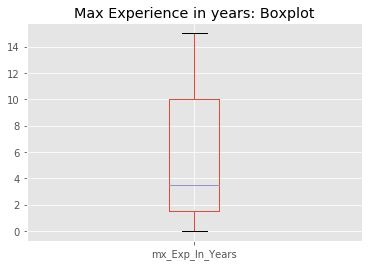

In [545]:
latest_use['mx_Exp_In_Years'].plot(kind = 'box')
plt.title('Max Experience in years: Boxplot')

2. __Score__ probably is system assigned, and it typically ranges between 0 to 300.

Text(0.5, 1.0, 'Score: Histogram')

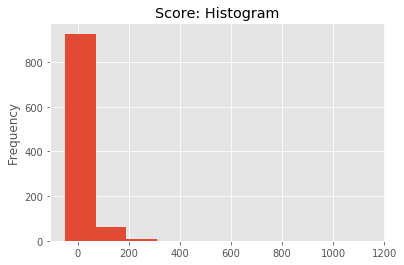

In [587]:
latest_use['Score'].plot(kind = 'hist')
plt.title('Score: Histogram')

3. __Engagement Score__ typically lies between 0 to 140, furthur information can be obtained in bivariate analysis, later.

Text(0.5, 1.0, 'Max Experience in years: Histogram')

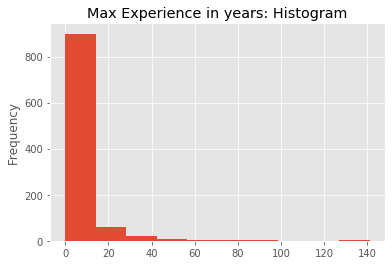

In [564]:
latest_use['EngagementScore'].plot(kind = 'hist')
plt.title('Max Experience in years: Histogram')

### For quanlitative variables in order: 

The graphs are self explainatory with key points mentioned.
For quantitative variables we shall mainly plot top factors affecting the particular variable
1. mx_Preferred_Campus
2. DoNotCall
3. DoNotEmail
4. Source  
5. SourceMedium 
6. SourceCampaign  
7. ProspectStage  
8. mx_Current_Interested_Program

In [558]:
def plot_top_n(s, n=5):
    '''
    returns a plot of top n factors for univariate analysis
    
    parameters:
    --------------
    s: pd.Series
    n: number of factors of the plot required
    '''
    counts = s.str.lower().str.capitalize().value_counts()
    top_counts = counts[:n]
    top_counts.plot(kind='bar', color = 'blue')
    
    return counts[:n]

1. __Top 7 max prefered campus by registered candidates__

Text(0.5, 1.0, 'Top seven Campus candidates are interested')

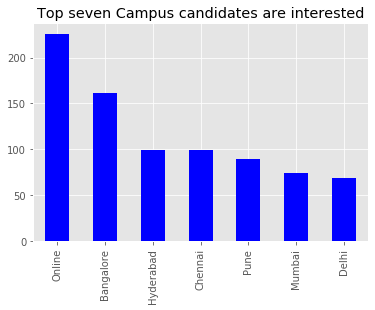

In [569]:
plot_top_n(latest_use['mx_Preferred_Campus'], 7)
plt.title('Top seven Campus candidates are interested')

#### 2. Distribution of candidates who have asked not to call

Text(0.5, 1.0, 'Do Not Call: Frequency')

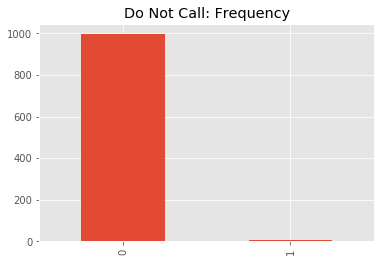

In [591]:
latest_use['DoNotCall'].value_counts().plot(kind = 'bar')
plt.title('Do Not Call: Frequency')

#### 3. Distribution of candidates who have asked not to Email 

Text(0.5, 1.0, 'DoNotEmail: Frequency')

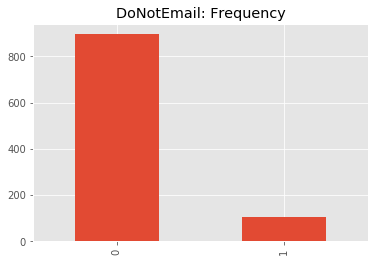

In [590]:
latest_use['DoNotEmail'].value_counts().plot(kind = 'bar')
plt.title('DoNotEmail: Frequency')

#### 4. Sources of information for the candidates

Text(0.5, 1.0, 'Top seven Sources candidates got to know about Great Learning')

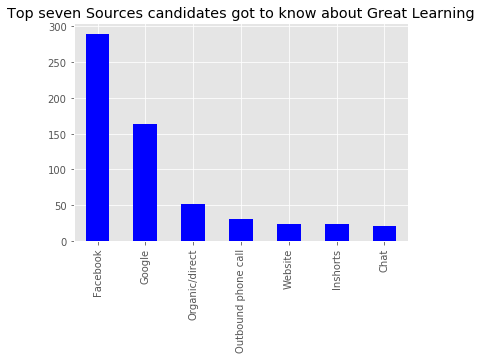

In [567]:
plot_top_n(latest_use['Source'], 7)
plt.title('Top seven Sources candidates got to know about Great Learning')

#### 5. Top seven sourcesMedian for the candidates

Text(0.5, 1.0, 'Top seven Sources candidates got to know about Great Learning')

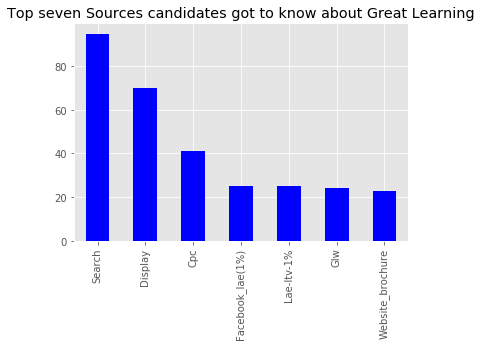

In [579]:
plot_top_n(latest_use['SourceMedium'], 7)
plt.title('Top seven sourcesMedian for the candidates')

#### 6. Top seven Sources Campaigns

Text(0.5, 1.0, 'Top seven Sources Campaigns')

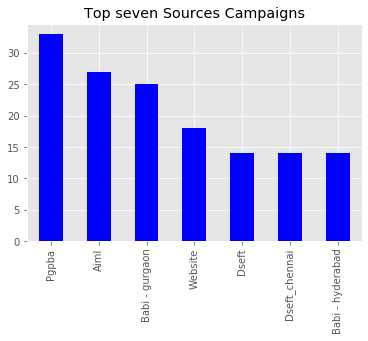

In [581]:
plot_top_n(latest_use['SourceCampaign'], 7)
plt.title('Top seven Sources Campaigns')

#### 7. Various Prospect Stages of the candidate

Text(0.5, 1.0, 'Various Prospect Stages')

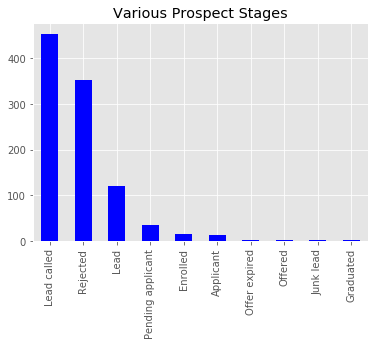

In [583]:
plot_top_n(latest_use['ProspectStage'], 10)
plt.title('Various Prospect Stages')

#### 8. Top five programs candidates are interested in

Text(0.5, 1.0, 'Top Five programs candidates are interested in')

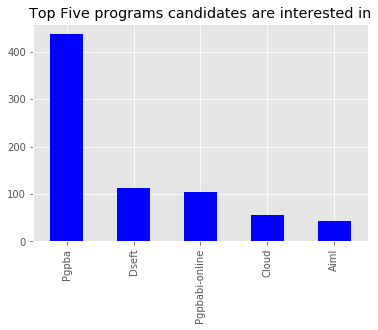

In [585]:
plot_top_n(latest_use['mx_Current_Interested_Program'], 5)
plt.title('Top Five programs candidates are interested in')

## Merge the two DataFrames: latest, trails

__Cons of merging__: Due to merging a lot of columns are duplicated, thus the size has increased.
So, for analysis part we shall only take in consideration the merged DataFrame if some findings require data from both DataFrames, else for all other cases we shall use only the respective dataFrames

In [464]:
latest_trail = pd.merge(latest_use, trail_use, how = 'inner', 
                        left_on = 'ProspectID', 
                        right_on = 'RelatedProspectId')

### Exploring the merged DataFrame

1. Drop related columns
2. Removing duplicates
3. find info, summary etc

In [523]:
#removing duplicates

latest_trail.drop_duplicates(inplace = True)

In [525]:
latest_trail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6799 entries, 0 to 6855
Data columns (total 20 columns):
ProspectID                            6799 non-null object
CreatedOn_x                           6799 non-null datetime64[ns]
mx_Preferred_Campus                   6491 non-null object
mx_Exp_In_Years                       6470 non-null float64
DoNotCall                             6799 non-null int64
DoNotEmail                            6799 non-null int64
Source                                6407 non-null object
SourceMedium                          6485 non-null object
SourceCampaign                        5357 non-null object
ProspectStage                         6799 non-null object
Score                                 6792 non-null float64
EngagementScore                       6792 non-null float64
mx_Current_Interested_Program         6792 non-null object
ActivityName                          6799 non-null object
CreatedOn_y                           6799 non-null dateti

In [472]:
# Dropping unnecessary columns

latest_trail.drop('RelatedProspectId', axis = 1, inplace= True)

In [588]:
# changing the name of the source in a proper way

latest_use['Source'] = latest_use['Source'].str.lower().str.capitalize()

C:\Users\Anurima\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [475]:
latest_trail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6856 entries, 0 to 6855
Data columns (total 20 columns):
ProspectID                            6856 non-null object
CreatedOn_x                           6856 non-null datetime64[ns]
mx_Preferred_Campus                   6545 non-null object
mx_Exp_In_Years                       6527 non-null float64
DoNotCall                             6856 non-null int64
DoNotEmail                            6856 non-null int64
Source                                6464 non-null object
SourceMedium                          6541 non-null object
SourceCampaign                        5408 non-null object
ProspectStage                         6856 non-null object
Score                                 6849 non-null float64
EngagementScore                       6849 non-null float64
mx_Current_Interested_Program         6849 non-null object
ActivityName                          6856 non-null object
CreatedOn_y                           6856 non-null dateti

In [491]:
latest_use['Source'].unique()

array(['google', 'facebook', 'Facebook', 'Zopim Chat', 'email', nan,
       'Main URL', 'Organic/Direct', 'website', 'Chat', 'glw',
       'brochuremail', 'Email', 'AIM', 'Linkedin', 'quora', 'zirca',
       'Brochuremail-bacp', 'sms', 'Outbound Phone call',
       'Customer Referral', 'aim', 'naukri', 'Google', 'collegedunia',
       'Great Lakes Website', 'Direct', 'bing', 'inshorts',
       'freshersworld', 'linkedin', 'Organic Search', 'CdB',
       'Inbound Phone call', 'Organic', 'demail', 'olp', 'Direct Traffic',
       'timesjob', 'youtube', 'website-contactus', 'website-popup',
       'zirca-cloud', 'Jobsforher', 'taboola', 'avm'], dtype=object)

### non na values in each group

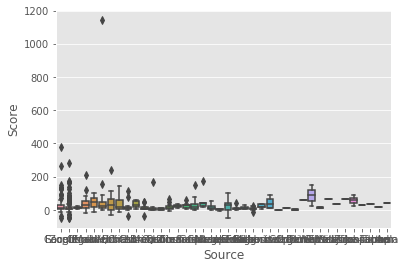

In [497]:
sns.boxplot(x = 'Source', y= 'Score', data = latest_use)

Text(0.5, 1.0, 'Score Vs. Engagement Score')

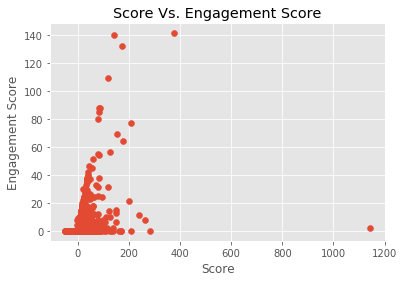

In [540]:
plt.scatter(x= latest['Score'], y=latest['EngagementScore'])
plt.xlabel('Score')
plt.ylabel('Engagement Score')
plt.title('Score Vs. Engagement Score')

In [476]:
latest_trail['mx_Exp_In_Years'].value_counts()

0.0     1652
10.0     995
6.5      888
1.5      763
3.5      546
15.0     487
13.5     449
4.0      425
2.5      318
1.0        2
7.0        2
Name: mx_Exp_In_Years, dtype: int64

In [477]:
latest_trail['ProspectStage_Pre'].value_counts()

Lead                 2198
Lead Called          2007
Applicant             848
Rejected              453
Pending Applicant     368
Enrolled              245
Offered               121
Selected               34
Offer Expired          33
Offer Accepted          4
Graduated               2
Invalid                 2
Junk Lead               2
Name: ProspectStage_Pre, dtype: int64

## Bivariate Analysis on latest focussing on Prospect Stage = 'Enrollment'

Plottinga and other univariate and bivariate analysis

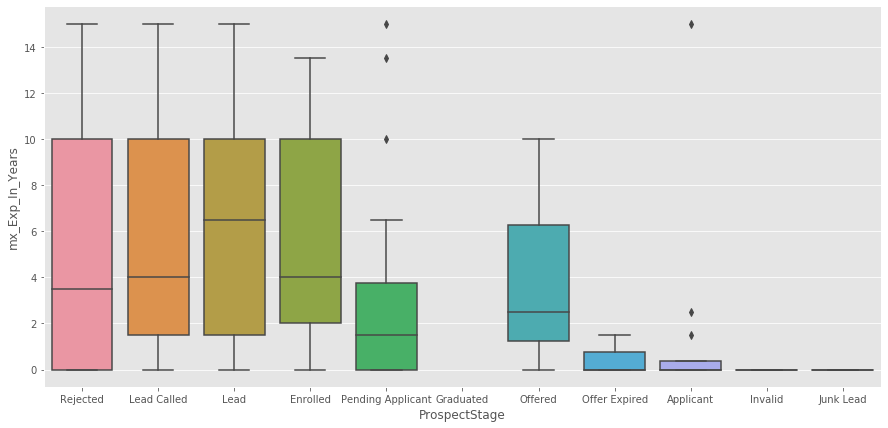

In [485]:
fig, ax = plt.subplots(figsize = (15,7))
sns.boxplot(x= 'ProspectStage', y = 'mx_Exp_In_Years', data = latest_use, ax = ax)

In [507]:
grp_sizes = latest_use[['Source','Score']].dropna().groupby(['Source']).size()

grp_sizes

top_grps = grp_sizes.sort_values(ascending = False)[:5].index

top_grps

top_grps_dfs = latest_use.loc[np.isin(latest_use['Source'], top_grps)]

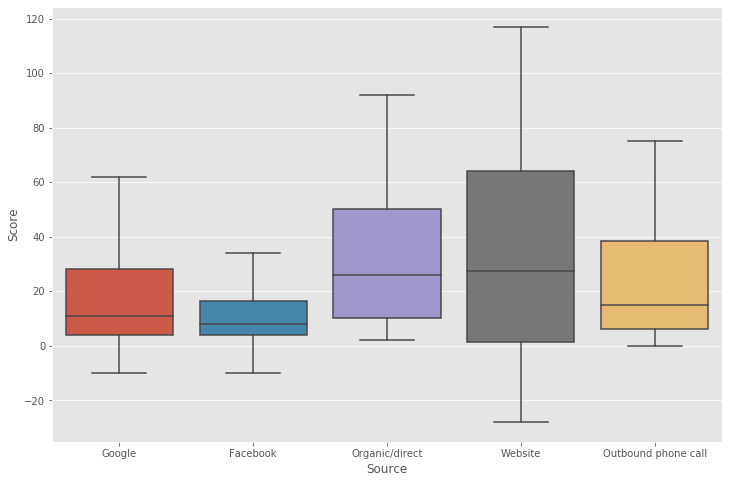

In [520]:
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot(data = top_grps_dfs, x= 'Source', y = 'Score', ax = ax, showfliers = False)